In [ ]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#@title Sistema de Ecuaciones Diferenciales
def SIR(t, y, gamma, beta):

    #gamma, beta = params
    ds = -beta*y[0]*y[1]
    di = beta*y[0]*y[1] - gamma*y[0]
    dr = gamma*y[1]

    return np.array([ds,di,dr])
    #return np.array([ds,di,dr])



In [ ]:

def fderivs(t,y,b,w): #Función con el modelo SIRD
    m=b/w
    S,I,R = y
    return (-1*b*I*S,b*I*S - m*I,m*I)

def solve_system(fderivs,T0, TF, Y0, DT, params, event=None): #Función que resuelve el modelo SIRD

    T = np.arange(T0, TF+DT, DT)
    return solve_ivp(fderivs, t_span=[T.min(), T.max()], y0=Y0, args=params, events=event)

In [ ]:
%matplotlib inline
def grafica(sol):

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(sol.t, sol.y[0], "b.-",label=r"Susceptibles")
    ax.plot(sol.t, sol.y[1], "r.-",label=r"Infecious")
    ax.plot(sol.t, sol.y[2], "g.-",label=r"Recovereds")


    ax.set_xlabel(r"Time")
    ax.set_ylabel(r"Susceptibles, Infecious, Recovereds")
    ax.legend()


    fig.suptitle("SIR epidemic without births or deaths")




beta = 0.35 gamma = 0.051470588235294115 omega = 6.8


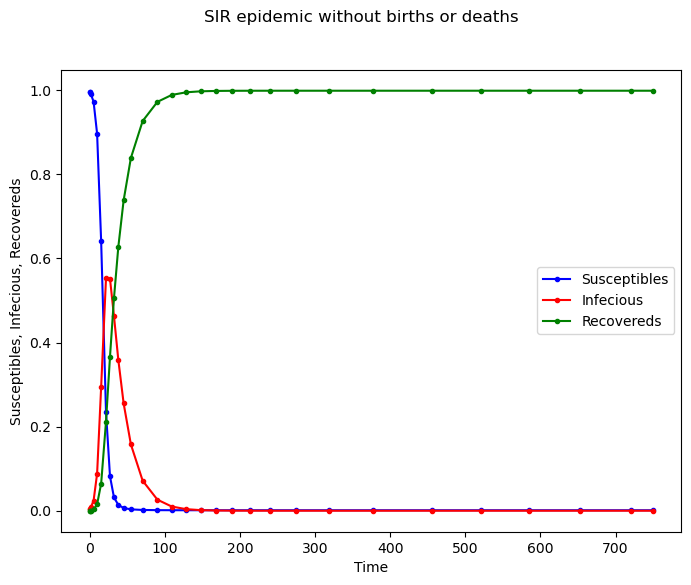

In [ ]:
Tf=750
omega = 6.8
beta = 0.35
gamma = beta/omega
params = [beta, omega]
print("beta =",beta , "gamma =",gamma, "omega =",omega)
CI =[0.995, 0.005 , 0]
sol = solve_system(fderivs,T0=0.0, TF=Tf, Y0=CI, DT=0.1, params=params)
grafica(sol)

beta = 0.1 gamma = 0.08 omega = 1.25


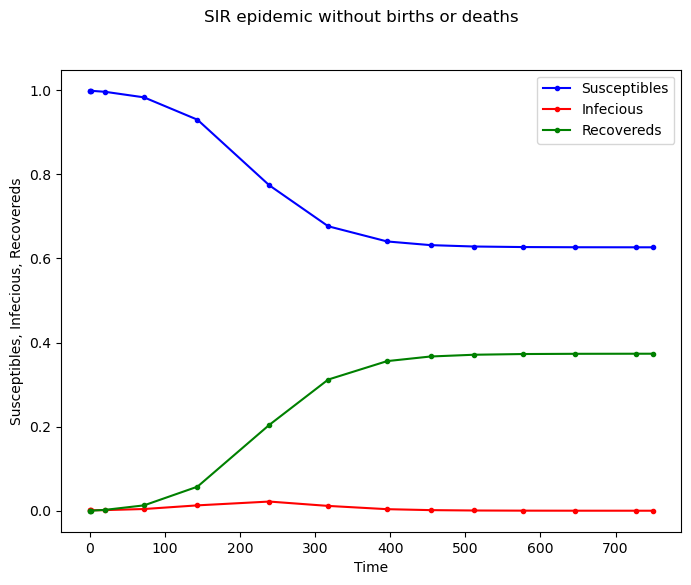

In [ ]:
Tf=750
gamma=0.08
beta = 0.1
omega = beta/gamma
params = [beta, omega]
print("beta =",beta , "gamma =",gamma, "omega =",omega)
CI =[0.999, 0.001 , 0]
sol = solve_system(fderivs,T0=0.0, TF=Tf, Y0=CI, DT=0.1, params=params)
grafica(sol)

beta = 0.1 gamma = 0.08 omega = 1.25


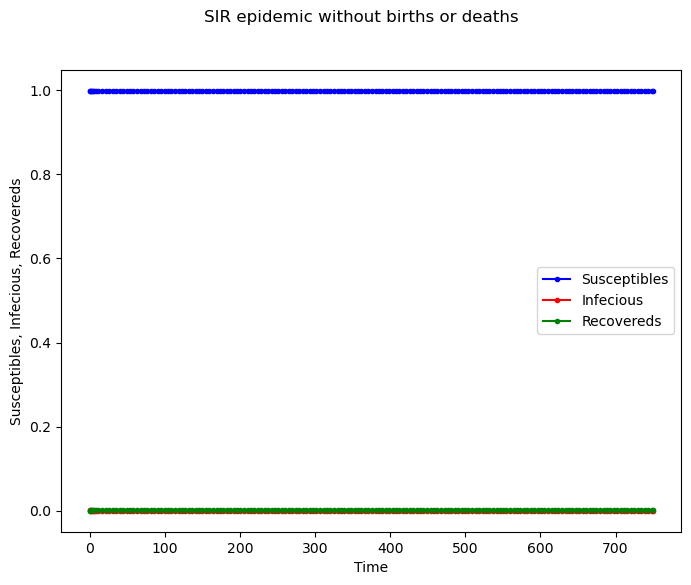

In [ ]:
Tf=750
gamma=0.08
beta = 0.1
omega = beta/gamma
params = [gamma, beta]
print("beta =",beta , "gamma =",gamma, "omega =",omega)
CI =[0.999, 0.001 , 0]
sol = solve_system(fderivs,T0=0.0, TF=Tf, Y0=CI, DT=0.1, params=params)
grafica(sol)